In [1]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


## Get the data

In [2]:
#get the data
messages = pd.read_csv('SMSSpamCollection.tsv',sep = '\t',names=['label','message'])
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
messages.shape

(5572, 2)

In [4]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [6]:
print(messages.isnull().sum())

label      0
message    0
dtype: int64


In [7]:
messages['length'] = messages['message'].apply(len)

In [8]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [9]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [10]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [11]:
print(messages[messages['length'] == 910]['message'])

1085    For me the love should start with attraction.i...
Name: message, dtype: object


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

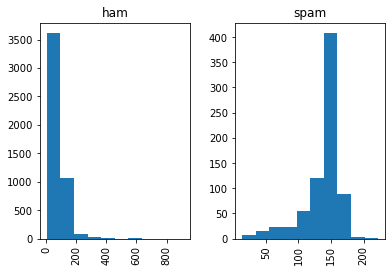

In [12]:
import seaborn as sns
messages.hist(column='length', by='label')

## Data Pre-processing

In [13]:
import string
from nltk.corpus import stopwords

In [14]:
def text_process(data):
    #removing punctuations
    nopunc = [char for char in data if char not in string.punctuation]
#    
    nopunc = ''.join(nopunc)
    #removing stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [15]:
data = messages['message'].apply(text_process)

In [16]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
data.head()

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Vectorization

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

### Bag of words

In [19]:
Bow = CountVectorizer(analyzer=text_process).fit_transform(messages['message'])

In [20]:
print(Bow,end=' ')

  (0, 2060)	1
  (0, 7555)	1
  (0, 8917)	1
  (0, 5769)	1
  (0, 1110)	1
  (0, 5218)	1
  (0, 8336)	1
  (0, 6937)	1
  (0, 11163)	1
  (0, 7668)	1
  (0, 6217)	1
  (0, 5217)	1
  (0, 1483)	1
  (0, 6906)	1
  (0, 4653)	1
  (0, 10965)	1
  (1, 3064)	1
  (1, 7701)	1
  (1, 2451)	1
  (1, 11072)	1
  (1, 10698)	1
  (1, 8590)	1
  (2, 1941)	1
  (2, 6331)	2
  (2, 423)	1
  :	:
  (5568, 6882)	1
  (5568, 11418)	1
  (5568, 6691)	1
  (5568, 6354)	1
  (5569, 8252)	1
  (5569, 3228)	1
  (5569, 3721)	1
  (5569, 10199)	1
  (5570, 7800)	1
  (5570, 11006)	1
  (5570, 8420)	1
  (5570, 10787)	1
  (5570, 6699)	1
  (5570, 9915)	1
  (5570, 6282)	1
  (5570, 6799)	1
  (5570, 5251)	1
  (5570, 7394)	1
  (5570, 6984)	1
  (5570, 7287)	1
  (5570, 4508)	1
  (5570, 5055)	1
  (5571, 8348)	1
  (5571, 10648)	1
  (5571, 3431)	1 

In [21]:
print('Shape of Sparse Matrix: ',Bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [22]:
print('Amount of Non-Zero occurences: ',Bow.nnz)

Amount of Non-Zero occurences:  50548


In [23]:
sparsity = (100.0 * Bow.nnz / (Bow.shape[0] * Bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


## TF-IDF
Term Frequency,TF(t) =  Number of times term t appears in a document) / (Total number of terms in the document).

Inverse Document Frequency,IDF(t) =  log_e(Total number of documents / Number of documents with term t in it).

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit_transform(Bow)
print(tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [25]:
print('Shape of Sparse Matrix: ',tfidf.shape)

Shape of Sparse Matrix:  (5572, 11425)


## Training a model

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(tfidf, messages['label'])

In [28]:
print('predicted:', spam_detect_model.predict(tfidf)[0])
print('expected:', messages.label[0])

predicted: ham
expected: ham


In [29]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.20,random_state=50)


In [30]:
from sklearn.pipeline import Pipeline

In [31]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [32]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001E213ECB0D0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [33]:
predictions = pipeline.predict(msg_test)

In [36]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1007
        spam       0.74      1.00      0.85       108

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



In [38]:
print("Accuracy: ",pipeline.score(msg_test,label_test))

Accuracy:  0.9668161434977578
